In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [ ]:
datapath = '/content/supermarket_sales.csv'

# Utilisez pd.read_excel pour lire un fichier Excel
data = pd.read_csv(datapath)

In [ ]:
data.shape

(1000, 24)

In [ ]:
data.describe()

,unit_cost,quantity,5pct_markup,revenue,cogs,gm_pct,gross_income,rating,branch_A,branch_B,branch_C,customer_type_Member,customer_type_Normal,gender_customer_Female,gender_customer_Male,hour,quarter
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,413.0
mean,0.507256,0.501111,0.302613,0.302613,0.302613,4.761905,15.379369,6.97270,0.340000,0.332000,0.32800,0.501000,0.499000,0.501000,0.499000,14.910000,1.0
std,0.294778,0.324826,0.238268,0.238268,0.238268,0.000000,11.708825,1.71858,0.473946,0.471167,0.46972,0.500249,0.500249,0.500249,0.500249,3.186857,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,4.761905,0.508500,4.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,10.000000,1.0
25%,0.253616,0.222222,0.110220,0.110220,0.110220,4.761905,5.924875,5.50000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,12.000000,1.0
50%,0.502336,0.444444,0.235636,0.235636,0.235636,4.761905,12.088000,7.00000,0.000000,0.000000,0.00000,1.000000,0.000000,1.000000,0.000000,15.000000,1.0
75%,0.754951,0.777778,0.446400,0.446400,0.446400,4.761905,22.445250,8.50000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,18.000000,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,4.761905,49.650000,10.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,20.000000,1.0


In [ ]:
data.head()

,invoice_id,city,product_line,unit_cost,quantity,5pct_markup,revenue,date,time,payment_method,...,branch_A,branch_B,branch_C,customer_type_Member,customer_type_Normal,gender_customer_Female,gender_customer_Male,day_of_week,hour,quarter
0,750-67-8428,Yangon,Health and beauty,0.718847,0.666667,0.521616,0.521616,2019-01-05,13:08,Ewallet,...,1,0,0,1,0,1,0,Saturday,13,1.0
1,226-31-3081,Naypyitaw,Electronic accessories,0.057855,0.444444,0.067387,0.067387,2019-03-08,10:29,Cash,...,0,0,1,0,1,1,0,Friday,10,1.0
2,631-41-3108,Yangon,Home and lifestyle,0.403316,0.666667,0.319628,0.319628,2019-03-03,13:23,Credit card,...,1,0,0,0,1,0,1,Sunday,13,1.0
3,123-19-1176,Yangon,Health and beauty,0.535603,0.777778,0.463549,0.463549,NaT,20:33,Ewallet,...,1,0,0,1,0,0,1,NaN,20,NaN
4,373-73-7910,Yangon,Sports and travel,0.848131,0.666667,0.604377,0.604377,2019-02-08,10:37,Ewallet,...,1,0,0,0,1,0,1,Friday,10,1.0


In [ ]:
data.tail()

,invoice_id,city,product_line,unit_cost,quantity,5pct_markup,revenue,date,time,payment_method,...,branch_A,branch_B,branch_C,customer_type_Member,customer_type_Normal,gender_customer_Female,gender_customer_Male,day_of_week,hour,quarter
995,233-67-5758,Naypyitaw,Health and beauty,0.336782,0.000000,0.030707,0.030707,NaT,13:46,Ewallet,...,0,0,1,0,1,0,1,NaN,13,NaN
996,303-96-2227,Mandalay,Home and lifestyle,0.971295,1.000000,0.980465,0.980465,2019-03-02,17:16,Ewallet,...,0,1,0,0,1,1,0,Saturday,17,1.0
997,727-02-1313,Yangon,Food and beverages,0.242101,0.000000,0.022049,0.022049,2019-02-09,13:22,Cash,...,1,0,0,1,0,0,1,Saturday,13,1.0
998,347-56-2442,Yangon,Home and lifestyle,0.620160,0.000000,0.056622,0.056622,NaT,15:33,Cash,...,1,0,0,0,1,0,1,NaN,15,NaN
999,849-09-3807,Yangon,Fashion accessories,0.870717,0.666667,0.618835,0.618835,NaT,13:28,Cash,...,1,0,0,1,0,1,0,NaN,13,NaN


In [ ]:
data.isnull().sum()

invoice_id         0
branch             0
city               0
customer_type      0
gender_customer    0
product_line       0
unit_cost          0
quantity           0
5pct_markup        0
revenue            0
date               0
time               0
payment_method     0
cogs               0
gm_pct             0
gross_income       0
rating             0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data = pd.get_dummies(data, columns=["branch", "customer_type", "gender_customer"])

In [ ]:
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%y', errors='coerce')
data['date'] = data['date'].combine_first(pd.to_datetime(data['date'], format='%m/%d/%Y', errors='coerce'))

In [ ]:
data['day_of_week'] = data['date'].dt.day_name()
data['hour'] = data['time'].str.split(':').str[0].astype(int)

In [ ]:
data['quarter'] = data['date'].dt.quarter

In [ ]:
scaler = MinMaxScaler()
columns_to_scale = ['unit_cost', 'quantity', '5pct_markup', 'revenue', 'cogs']
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

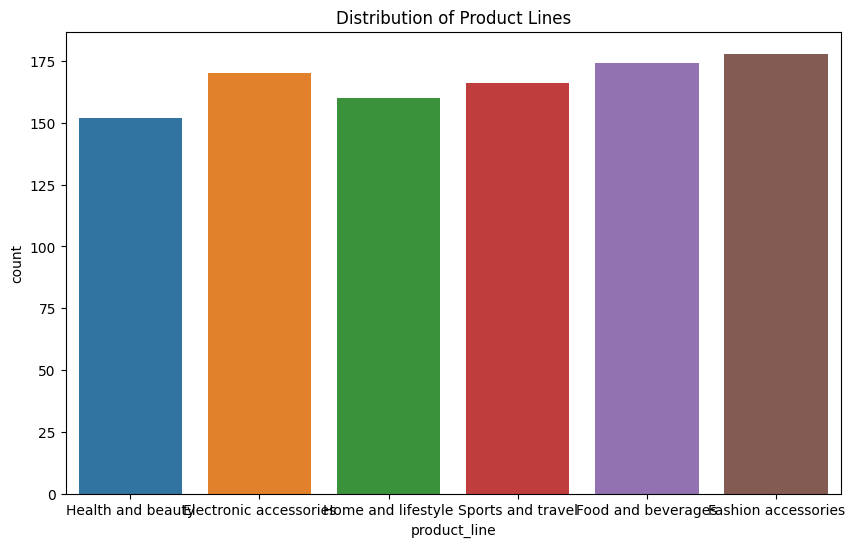

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(x='product_line', data=data)
plt.title('Distribution of Product Lines')
plt.show()

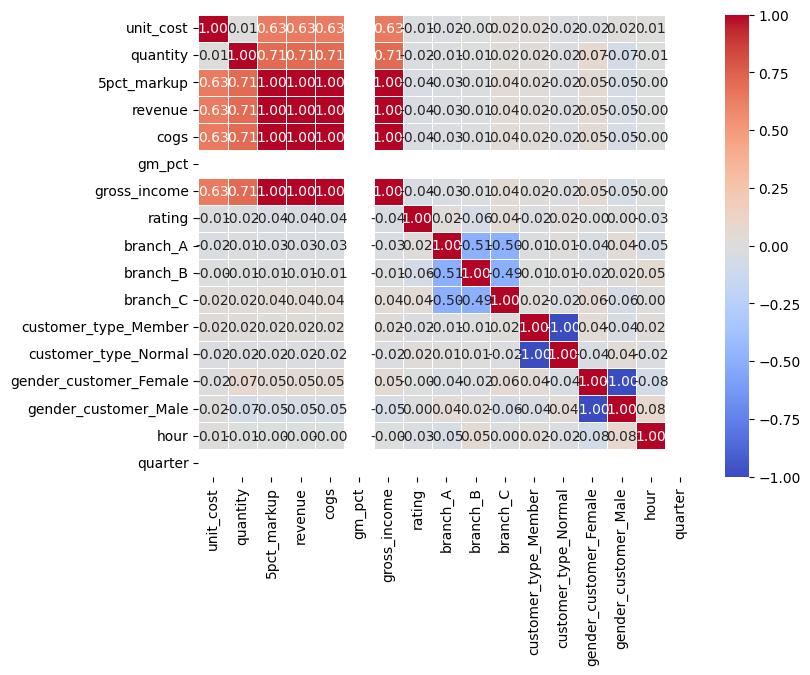

In [ ]:
numeric_columns = data.select_dtypes(include=[np.number]).columns
numeric_df = data[numeric_columns]
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

In [ ]:
dataexcel=pd.ExcelWriter('supermarketSales.xlsx')
data.to_excel(dataexcel)
dataexcel.save()

<ipython-input-21-575837ab33d4>:3: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  dataexcel.save()
